In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_excel('Salaries.xlsx')

In [3]:
data

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [4]:
inputs=data.drop('salary_more_then_100k',axis='columns')

In [5]:
targets=data['salary_more_then_100k']

In [6]:
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [8]:
targets

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
company_lbl=LabelEncoder()
job_lbl=LabelEncoder()
degree_lbl=LabelEncoder()

In [11]:
inputs['new_company']=company_lbl.fit_transform(inputs['company'])
inputs['new_job']=company_lbl.fit_transform(inputs['job'])
inputs['new_degree']=company_lbl.fit_transform(inputs['degree'])

In [12]:
inputs

,company,job,degree,new_company,new_job,new_degree
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [13]:
inputs_new=inputs.drop(['company','job','degree'],axis=1)

In [14]:
inputs_new

,new_company,new_job,new_degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [15]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(inputs_new,targets,test_size=0.2,random_state=42)

In [18]:
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
dc.predict(X_test)

array([0, 0, 0, 1], dtype=int64)

In [20]:
y_test

0     0
1     0
5     1
14    1
Name: salary_more_then_100k, dtype: int64

In [21]:
dc.score(X_test,y_test)

0.75

In [22]:
from sklearn import tree

[Text(167.40000000000003, 190.26, 'X[0] <= 0.5\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(100.44000000000001, 135.9, 'X[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(66.96000000000001, 81.53999999999999, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(33.480000000000004, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(100.44000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(133.92000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(234.36, 135.9, 'X[0] <= 1.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(200.88000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(267.84000000000003, 81.53999999999999, 'X[1] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(234.36, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(301.32000000000005, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

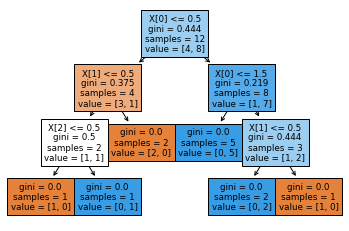

In [24]:
tree.plot_tree(dc,filled=True)